In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [14]:
#separating the labels and pixel data
y_train=train[['label']]
X_train=train.drop('label',axis=1)

<Axes: xlabel='label', ylabel='count'>

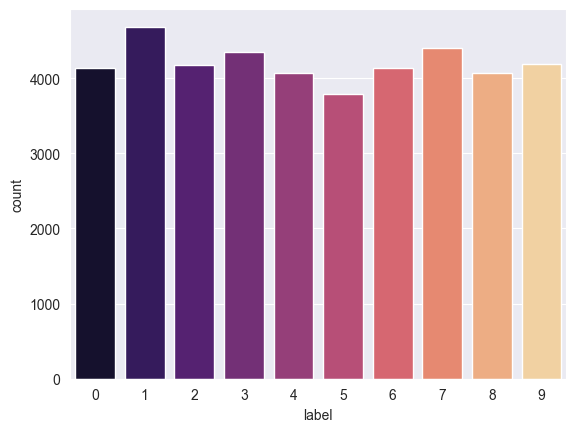

In [17]:
#visualizing the distribution of data , for each of the digits
sns.set_style('darkgrid')
sns.countplot(x='label',data=y_train,palette='magma')

In [18]:
X_train=X_train.values.reshape(-1,28,28,1)

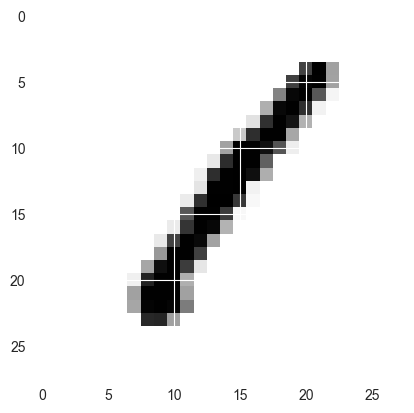

In [22]:
some_digit=X_train[0]
plt.imshow(some_digit,cmap='binary')

In [23]:
y_train.iloc[0]

label    1
Name: 0, dtype: int64

In [24]:
#normalizing the data
X_train=X_train/255.0

In [25]:
X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.2)

<p style = "font-size : 42px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Data Augmentation</strong></p>
<p> Data Augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples. The intent is to reduce overfitting when training neural networks. </p>

In [26]:
image_gen=ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, vertical_flip=False)
image_gen.fit(X_train)

<p style = "font-size : 42px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Create a CNN model</strong></p>

In [27]:
model=Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',padding='Same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5),padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history=model.fit(X_train_, y_train_, batch_size=64, epochs=20, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
525/525 [==============================] - 64s 119ms/step - loss: 0.4345 - accuracy: 0.8621 - val_loss: 0.0771 - val_accuracy: 0.9790
Epoch 2/20
525/525 [==============================] - 63s 119ms/step - loss: 0.1330 - accuracy: 0.9633 - val_loss: 0.0550 - val_accuracy: 0.9825
Epoch 3/20
525/525 [==============================] - 62s 117ms/step - loss: 0.1013 - accuracy: 0.9735 - val_loss: 0.0463 - val_accuracy: 0.9848
Epoch 4/20
525/525 [==============================] - 67s 128ms/step - loss: 0.0806 - accuracy: 0.9789 - val_loss: 0.0461 - val_accuracy: 0.9870
Epoch 5/20
525/525 [==============================] - 64s 122ms/step - loss: 0.0764 - accuracy: 0.9783 - val_loss: 0.0431 - val_accuracy: 0.9876
Epoch 6/20
525/525 [==============================] - 64s 122ms/step - loss: 0.0615 - accuracy: 0.9828 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 7/20
525/525 [==============================] - 64s 121ms/step - loss: 0.0561 - accuracy: 0.9850 - val_loss: 0.0323 - val_ac

In [29]:
test_=test.copy()

In [30]:
test_=test_.values.reshape(-1,28,28,1)
test_=test_/255.0

In [31]:
y_pred=model.predict(test_)

875/875 [==============================] - 11s 12ms/step


In [32]:
y_pred=np.argmax(y_pred,axis=1)

In [34]:
# Saving the model and weights
model_json = model.to_json()
with open("cnn_model_mnist.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('cnn_model_mnist.h5')

In [38]:
# Saving the predictions
np.savetxt('cnn_predictions_mnist.csv', y_pred, delimiter=',', fmt='%d')